In [1]:
# primero nuestras librerias!

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [4]:
# cargamos el dataframe que vamos a usar
df = pd.read_csv("world_data_full_apply_nulos.csv", index_col = 0) 
df.head(2)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe


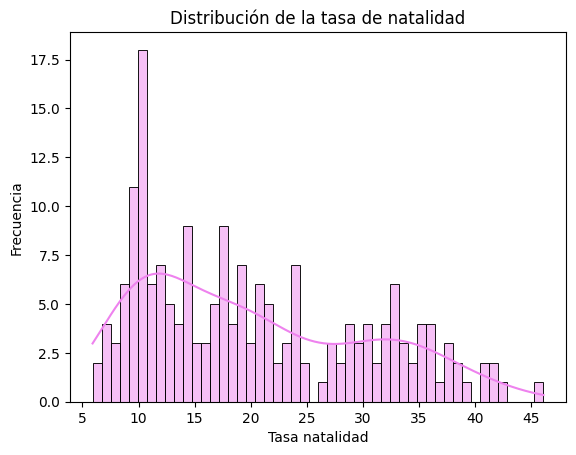

In [5]:
# 1. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

# Usamos un histograma para ver cómo se distribuyen los precios. 
# Si los datos no son muy dispersos, un gráfico de densidad también es útil.

# creamos la gráfica de seaborn
sns.histplot(x = "birth_rate", 
             data = df, 
             color = "violet", 
             kde = True, 
             bins = 50 )  #bins = intervalos

# usando 'plt.xlabel()' cambiamos el nombre del eje x
plt.xlabel("Tasa natalidad")

# usando el método 'plt.ylabel()' cambiamos el nombre del eje y
plt.ylabel("Frecuencia")

# ponemos un título usando el método 'plt.title()'
plt.title('Distribución de la tasa de natalidad');

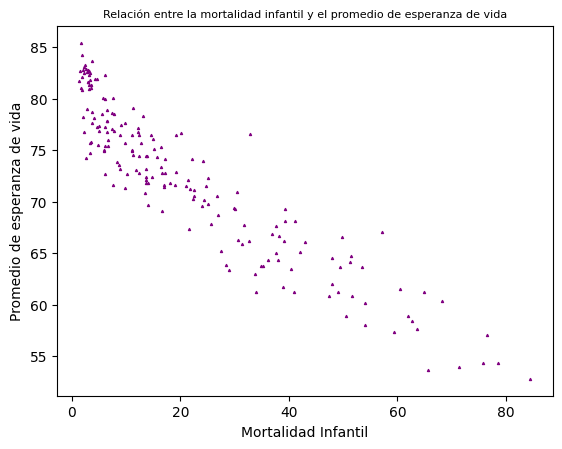

In [6]:
# 2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? 
# Proporciona una breve descripción de los patrones que observes.

plt.scatter(x = "infant_mortality", 
            y = "life_expectancy", 
            data = df, 
            c = "purple", 
            s = 2, 
            marker = "^" )

# ponemos los nombres de los ejes
plt.xlabel("Mortalidad Infantil")
plt.ylabel("Promedio de esperanza de vida")

# ponemos un título usando el método 'plt.title()'
# en este caso lo que hemos añadido es al parámetro 'fontsize' que nos permite cambiar el tamaño del título
plt.title("Relación entre la mortalidad infantil y el promedio de esperanza de vida", fontsize = 8);

#### Sí, encontramos una relación lineal negativa entre ambos datos: cuando existe una elevada mortalidad infantil, la esperanza de vida es baja y al contrario. También vemos que los datos están más condensados en zonas donde la mortalidad infantil es baja y la esperanza de vida alta y mucho más dispersos cuando la mortalidad infantil es superior a 25 y la esperanza de vida inferior a unos 67 años.

In [7]:
# 3. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países 
# en ese continente.

df["continent"].unique()

array(['Asia', 'Europe', 'Africa', 'Central America', 'South America',
       'Oceania', 'North America', nan], dtype=object)

In [12]:
continent_order = df['continent'].value_counts().index

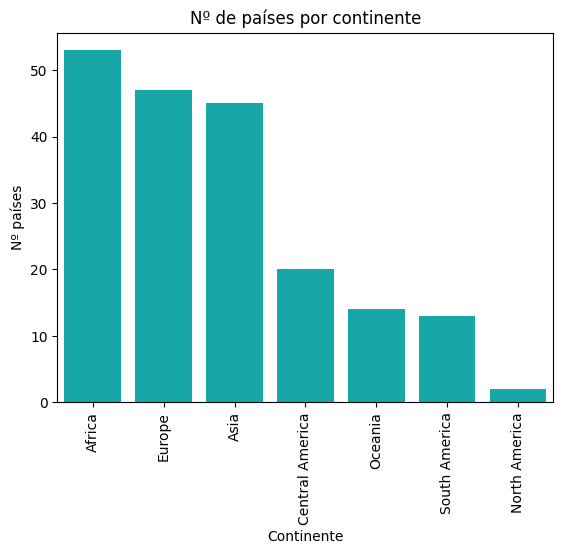

In [13]:

df["continent"].unique()

sns.countplot(x = "continent", 
              data = df,
              color = "c",
              order = continent_order)
              

# giramos las etiquetas del eje "x", en este caso a 90º. En este caso solo vamos a usar el parámetro 'rotation', 
# más adelante veremos mas ejemplos para usar los otros parámetros. 
plt.xticks(rotation = 90)

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()' ya que estamos creando solo una gráfica
plt.xlabel("Continente")
plt.ylabel("Nº países")
plt.title("Nº de países por continente");